<a href="https://colab.research.google.com/github/Sulaiman29/BDA_HW4/blob/main/Copy_of_BDA2025Spring_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 04</font></center></h1>
<h2><center> <font color='black'> Cross-sell / Up-sell using Recommendations</font></center></h2>    
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Spring 2024</font></center></h2>
</div>

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID.

- Please provide code where ever applicable.

- The accepted submission format is .ipynb file. If you are sharing Colab link, make sure that the privacy settings for the file is public so we can access your code.

- The submission will automatically close on <font color='red'>**04 May at 23:59**</font>, so please make sure to submit before the deadline.

- ONLY one of the teammates should submit the homework and in the submission description the other person's Name and Student ID must be entered. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY.

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues.

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://ut.ee/en/content/academic-fraud).

- <font color='red'>**DO NOT CHANGE THE TEMPLATE**</font>

- <font color='red'>**Restart the Kernel and Run all the cells once again after you are done.**</font>
This will ensure that all the cells run without error. You will find an option in the top menu bar under Kernel tab.

**<h2><font color='red'>Team mates:</font></h2>**


<font color='red'>Name Surname:</font>&emsp; MD MURAD ALAHI MISU  <font color='red'>Student ID: </font> C46989


<font color='red'>Name Surname: </font>&emsp; Muhammad Sulaiman Javed  <font color='red'>Student ID: YYYY</font> C47046

### The homework is divided into four sections and the points are distributed as below:
<pre>
- Market Basket Analysis    -> 3 points
- Collaborative Filtering   -> 3.5 points
- Recommendor Systems       -> 1.5 points
- Neural Networks           -> 3 points
__________________________________________
Total                       -> 11 points
</pre>

# 1.  Market Basket Analysis (3 points)

**1.1 Consider the following businesses and think about one case of cross selling and one case of up selling techniques they could use. This question is not restricted to only traditional, standard examples. If you wish you can provide something that you would like these businesses to do. (2 points)**

a. An OnlineTravel Agency like Booking.com or AirBnB

<font color='red'> **Cross selling:**</font> Recommending a Taxi service from the airport to the hotel

<font color='red'> **Up selling:**</font> Upgrading your single room to a Deluxe Room with free breakfast


b. A software company which produces products related to cyber security like Norton, Kaspersky, Avast and similar ones.

<font color='red'> **Cross selling:**</font> Recommending a Password Manager Vault

<font color='red'> **Up selling:**</font> Suggesting upgrading your virus shields to multiple device protection

c. A company that sells cell phones

<font color='red'> **Cross selling:**</font> Recommend accessories combo wireless earbuds + smart watch

<font color='red'> **Up selling:**</font> Suggest a phone model with a higher storage and battery capacity

d. A supermarket like Konsum, Rimi, Maxima etc.

<font color='red'> **Cross selling:**</font> Suggesting charcoal, grills, sauces when customer buys grill meat

<font color='red'> **Up selling:**</font> Offer loyalty/client card discounts on daily gourmet products to attract customers

**1.2.0 One of the techniques which we discussed in the theory lecture for recommendater systems is Market Basket Analysis. The aim is to study the products bought frequently together and to recommend product in bundles. Let's suppose that our client is a retail company that has an online shop. They have given to us the OnlineRetail.csv dataset (we have previously used this dataset in our practice sessions 03). It contains data about the online sales of several products. The client or  wants to know which product bundles to promote. Let us find the 5 association rules with the highest lift.**

In [3]:
import pandas as pd

df = pd.read_csv('OnlineRetailPurchase.csv', header=0 )

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**1.2 Use describe function from pandas to get statistical information about the values in the dataframe. Do you notice something which might not be correct? If so please perform the necessary operations. (Hint: Remember what we did in the practice session 03)(0.25 points)**

In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()
# Observation: minimum values for both Quantity and UnitPrice are negative or zero, which isn’t valid for actual sales
# cleaning the data
df_clean = df[
    (df['Quantity'] > 0) &
    (df['UnitPrice'] > 0) &
    (~df['InvoiceNo'].astype(str).str.startswith('C'))
]

print("\nAfter cleaning:")
print(df_clean.describe())


After cleaning:
       Quantity  UnitPrice  CustomerID
count   9854.00    9854.00     7608.00
mean       9.15       3.84    15621.15
std       45.76      14.40     1755.24
min        1.00       0.10    12395.00
25%        1.00       1.25    14388.00
50%        3.00       2.51    15640.00
75%        8.00       4.21    17228.00
max     2880.00     887.52    18239.00


**1.3 Create a dataframe name as "Basket", where each row has an distintive value of InvoiceNo and each column has a distinctive Description. The cells in the table contain the count of each item (Description) mentioned in one invoice. For example basket.loc['536365','WHITE HANGING HEART T-LIGHT HOLDER'] has a value of 1 because the product with WHITE HANGING HEART T-LIGHT HOLDER was entered  only once in the invoice 536365. Hint: Remember the function you used in Homework 1 for a similar task or in practice session no.07 (0.25 points)**

In [6]:
#TODO
basket = pd.crosstab(df_clean['InvoiceNo'], df_clean['Description'])
basket.rename_axis(None, inplace=True)
basket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 536365 to 537224
Columns: 1969 entries,  4 PURPLE FLOCK DINNER CANDLES to ZINC WILLIE WINKIE  CANDLE STICK
dtypes: int64(1969)
memory usage: 6.4+ MB


**1.4 Some products are mentioned more than once in one invoice. You can check the maximum number for each column to verify. Modify your dataframe such that every cell which has a value higher than one will be replaced with 1. If the cell has the value 0 it will remain the same. (0.25 points)**

In [7]:
''' check and verify those products that occur more than once
max_per_item = basket.max()

# inspect the top 10 products that ever sold more than once on a single invoice
#print(max_per_item.sort_values(ascending=False).head(10))

# see only those that actually exceed 1
multi_buy = max_per_item[max_per_item > 1]
print(multi_buy.sort_values(ascending=False))'''

basket_sets = basket.map(lambda x: 1 if x > 1 else x)

**1.5 We do not need to spend time on calculating the association rules by ourselves as there already exists a package for python to do so, called mlxtend. We are going to use the mlxtend package to find frequent items bought together and then create some rules on what to recomend to a user based on what he/she/they have bought. We have given you the first part of the code which calculates the frequent items bought together.**

In [8]:
#!pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import math

In [9]:
# Mlxtend has implemented Apriori, a popular algorithm for extracting frequent itemsets
# We can change the value of minimum support but it will
# But as well we get less useful results for the next step.
# Setting use_colnames=True to convert the returned integer indices into item names
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.04,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.03,(10 COLOUR SPACEBOY PEN)
2,0.04,(12 PENCILS SMALL TUBE RED RETROSPOT)
3,0.03,(12 PENCILS SMALL TUBE SKULL)
4,0.03,(3 PIECE SPACEBOY COOKIE CUTTER SET)
...,...,...
13602,0.03,"(WOOD S/3 CABINET ANT WHITE FINISH, WHITE META..."
13603,0.03,"(WOODEN FRAME ANTIQUE WHITE , WOOD S/3 CABINET..."
13604,0.03,"(WOODEN FRAME ANTIQUE WHITE , WOOD S/3 CABINET..."
13605,0.03,"(WOODEN FRAME ANTIQUE WHITE , WOOD S/3 CABINET..."


**Please read the documentation of the associaton rules function in mlextend [here](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) and then complete the code so we get the 5 rules with the highest lift. Print those rules.  In the output antecedents represent if .... clause and consequents represent else... clause. For example if user bought product basket A then  the algorithm recommends product basket B. (0.25 points)**

In [10]:
#TODO

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
top5 = rules.sort_values('lift', ascending=False).head(5)

# Print
for _, row in top5.iterrows():
    antecedents = ', '.join(row['antecedents'])
    consequents = ', '.join(row['consequents'])
    print(f"If a user bought {{{antecedents}}}, "
          f"then recommend {{{consequents}}} "
          f"(support={row['support']:.2f}, "
          f"confidence={row['confidence']:.2f}, "
          f"lift={row['lift']:.2f})")

If a user bought {WOOD S/3 CABINET ANT WHITE FINISH, VINTAGE BILLBOARD DRINK ME MUG, KNITTED UNION FLAG HOT WATER BOTTLE, VINTAGE BILLBOARD LOVE/HATE MUG, RETRO COFFEE MUGS ASSORTED, RED WOOLLY HOTTIE WHITE HEART.}, then recommend {WOOD 2 DRAWER CABINET WHITE FINISH, CREAM CUPID HEARTS COAT HANGER, WOODEN FRAME ANTIQUE WHITE , GLASS STAR FROSTED T-LIGHT HOLDER} (support=0.03, confidence=1.00, lift=32.62)
If a user bought {VINTAGE BILLBOARD LOVE/HATE MUG, WOOD S/3 CABINET ANT WHITE FINISH, GLASS STAR FROSTED T-LIGHT HOLDER}, then recommend {CREAM CUPID HEARTS COAT HANGER, WHITE HANGING HEART T-LIGHT HOLDER, WOODEN PICTURE FRAME WHITE FINISH, KNITTED UNION FLAG HOT WATER BOTTLE, WOOD 2 DRAWER CABINET WHITE FINISH, WHITE METAL LANTERN, RED WOOLLY HOTTIE WHITE HEART.} (support=0.03, confidence=1.00, lift=32.62)
If a user bought {WOOD 2 DRAWER CABINET WHITE FINISH, CREAM CUPID HEARTS COAT HANGER, WHITE HANGING HEART T-LIGHT HOLDER}, then recommend {WOOD S/3 CABINET ANT WHITE FINISH, WOODEN 

# 2. Collaborative filtering (3.5 points )

We are going to use Books.csv dataset which contains  ratings from Amazon website and the data has the following features:

UserID: The ID of the users who read the books

BookTitle: The title of the book

Book-Rating: A rating given to the book in a scale from 0 to 10

Below we are going to perform the same steps we did with movies dataset in the practice session

**2.0 Load the dataset and take a look at the books titles. Please pick one of them which you like (or think that you would like) the most.(0.1 points)**

In [11]:
df_books = pd.read_csv('Books.csv', header=0)
print(df_books['BookTitle'].unique())

# mybook = 'The Da Vinci Code'

['Flesh Tones: A Novel' 'Rites of Passage' 'The Notebook' 'Help!: Level 1'
 'The Amsterdam Connection : Level 4 (Cambridge English Readers)'
 'Les Particules Elementaires' 'A Painted House' 'Lightning'
 'Manhattan Hunt Club' 'Dark Paradise' 'Night Sins' 'At the Edge'
 'Make Them Cry' 'Little Altars Everywhere'
 'How Stella Got Her Groove Back' 'The Law of Love' 'Waiting to Exhale'
 'Birdsong: A Novel of Love and War' 'How to Deal With Difficult People'
 'Change Your Job, Change Your Life: High Impact Strategies for Finding Great Jobs in the Decade Ahead (Change Your Job Change Your Life, 7th ed)'
 'The Golden Rule of Schmoozing'
 'Apricots on the Nile: A Memoir with Recipes'
 'Reise nach Ixtlan. Die Lehre des Don Juan.'
 'The Girl Who Loved Tom Gordon : A Novel' 'The Pillars of the Earth'
 'Southampton Row (Charlotte &amp' 'CLOUT' 'See Jane Run' 'The Dark Half'
 'House of the Sun (Shadowrun)' 'God Game' 'Vater Himmel, Mutter Erde.'
 'Besiegt vom Sturm der Leidenschaft.' 'Sturm der Lieb

**2.1 Our next step will be to perform user based collaborative filtering using KNN algorithm. As KNN algorithm does not accept strings, use a Label Encoder for BookTitle column.After that reshape the books matrix using pivot so every column will be a UserID and every row a BookTitle. (0.45 points)**

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_books['BookTitleEnc'] = le.fit_transform(df_books['BookTitle'])

books_matrix = df_books.pivot_table(
    index='BookTitleEnc',
    columns='UserID',
    values='Book-Rating',
    fill_value=0
)

print(books_matrix.shape)
books_matrix.head()



(336, 6292)


UserID,0,1,2,3,4,5,6,7,8,9,...,6282,6283,6284,6285,6286,6287,6288,6289,6290,6291
BookTitleEnc,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


**2.2 Build a sparse matrix for books data and show it. (0.45 points)**

In [13]:
from scipy.sparse import csr_matrix

sparse_matrix = csr_matrix(books_matrix.values)

print("Sparse matrix representation:")
print(sparse_matrix)
print(f"\nShape: {sparse_matrix.shape}")
print(f"Non-zero entries: {sparse_matrix.nnz}")

Sparse matrix representation:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4304 stored elements and shape (336, 6292)>
  Coords	Values
  (1, 6228)	5.0
  (2, 365)	7.0
  (2, 5110)	9.0
  (2, 5226)	10.0
  (2, 6209)	10.0
  (3, 91)	7.0
  (3, 135)	8.0
  (3, 139)	10.0
  (3, 258)	9.0
  (3, 429)	6.0
  (3, 760)	5.0
  (3, 821)	6.0
  (3, 869)	9.0
  (3, 984)	10.0
  (3, 1328)	5.0
  (3, 1425)	10.0
  (3, 1781)	2.0
  (3, 1815)	9.0
  (3, 1820)	9.0
  (3, 1951)	8.0
  (3, 2360)	8.0
  (3, 2384)	8.0
  (3, 2449)	9.0
  (3, 2468)	7.0
  (3, 2956)	5.0
  :	:
  (333, 3411)	4.0
  (333, 3416)	1.0
  (333, 3433)	8.0
  (333, 3445)	5.0
  (333, 3450)	2.0
  (333, 3456)	4.0
  (333, 3461)	8.0
  (333, 3491)	2.0
  (333, 3497)	1.0
  (333, 3501)	4.0
  (333, 3518)	8.0
  (333, 3519)	3.0
  (333, 3527)	7.0
  (333, 3543)	7.0
  (333, 3546)	9.0
  (333, 3547)	7.0
  (333, 3573)	5.0
  (333, 3575)	1.0
  (333, 3581)	7.0
  (333, 3597)	3.0
  (333, 3602)	6.0
  (333, 3666)	3.0
  (333, 3668)	9.0
  (333, 6250)	2.0
  (333, 6277)	9.

**2.3 Build and train two different KNN models (use cosine metric for similarity for both). Recommend top 5 books based on your favourite one from 2.0 (1 points)**

In [14]:
from sklearn.neighbors import NearestNeighbors

# Model 1
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(sparse_matrix)

# Model 2
model_knn_2 = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=20, n_jobs=-1)
model_knn_2.fit(sparse_matrix)


mybook = 'The Da Vinci Code'
mybook_index = le.transform([mybook])[0]

distances, indices = model_knn.kneighbors(books_matrix.iloc[mybook_index, :].values.reshape(1, -1), n_neighbors=6)
distances_2, indices_2 = model_knn_2.kneighbors(books_matrix.iloc[mybook_index, :].values.reshape(1, -1), n_neighbors=6)

print("Recommendations using Model 1:")
for i in range(1, len(distances.flatten())):
    print(f"{le.inverse_transform([books_matrix.index[indices.flatten()[i]]])[0]} (distance: {distances.flatten()[i]:.2f})")

print("\nRecommendations using Model 2:")
for i in range(1, len(distances_2.flatten())):
    print(f"{le.inverse_transform([books_matrix.index[indices_2.flatten()[i]]])[0]} (distance: {distances_2.flatten()[i]:.2f})")


Recommendations using Model 1:
The Lovely Bones: A Novel (distance: 0.91)
Harry Potter and the Order of the Phoenix (Book 5) (distance: 0.94)
Southampton Row (Charlotte &amp (distance: 0.94)
A Kiss of Shadows (Meredith Gentry Novels (Paperback)) (distance: 0.95)
Speaking in Tongues (distance: 0.95)

Recommendations using Model 2:
The Lovely Bones: A Novel (distance: 0.91)
Harry Potter and the Order of the Phoenix (Book 5) (distance: 0.94)
Southampton Row (Charlotte &amp (distance: 0.94)
A Kiss of Shadows (Meredith Gentry Novels (Paperback)) (distance: 0.95)
Speaking in Tongues (distance: 0.95)


**2.4 Discuss the results you received. Would you like to read some of the recommended books? Are the recommendation system good? (There is no right or wrong answer in this question) (0.25 points)**

<font color='red'> **Answer:**</font>
The Lovely Bones is definitely on my radar—it’s a suspenseful, character-driven novel, so the thematic mood matches fairly well with a thriller-mystery like The Da Vinci Code.

Both “brute” and “auto” solvers agree, which suggests the nearest-neighbor structure is stable.

The Harry Potter pick is more of a genre outlier, but it often shows up in collaborative filters simply because it’s massively popular and co-rated by many of the same readers.

**2.5 Add a new user (with user “UserID” = 6293) in your data. By training a new KNN model suggest which books should this user read if his ratings are:**

French Cuisine for All: 4


Harry Potter and the Sorcerer's Stone Movie Poster Book: 5


El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer: 1

**(1. 25 points)**



In [15]:
new_user_data = {
    'UserID': [6293]*3,
    'BookTitle': [
        'French Cuisine for All',
        "Harry Potter and the Sorcerer's Stone Movie Poster Book",
        'El Perfume: Historia De UN Asesino/Perfume : The Story of a Murderer'
    ],
    'Book-Rating': [4, 5, 1]
}
new_user_df = pd.DataFrame(new_user_data)
df_all = pd.concat([df_books, new_user_df], ignore_index=True)

# Label-encode titles & pivot
le = LabelEncoder()
df_all['BookEnc'] = le.fit_transform(df_all['BookTitle'])

books_matrix = df_all.pivot_table(
    index='BookEnc',
    columns='UserID',
    values='Book-Rating',
    fill_value=0
)

# Build sparse and train two models
sparse_mat = csr_matrix(books_matrix.values)

# Item–item
item_model = NearestNeighbors(metric='cosine',
                             algorithm='brute',
                             n_neighbors=6,
                             n_jobs=-1)
item_model.fit(sparse_mat)

# User–user
user_model = NearestNeighbors(metric='cosine',
                             algorithm='brute',
                             n_neighbors=6,
                             n_jobs=-1)
user_model.fit(sparse_mat.T)

# Extract the new user’s rating vector
new_user_id = 6293
new_user_ratings = books_matrix[new_user_id].values.reshape(1, -1)

# Find the 6 nearest *users* (first neighbor is the user itself)
dist_u, idx_u = user_model.kneighbors(new_user_ratings, n_neighbors=6)

# aggregate the other 5 users’ ratings
sim_users = books_matrix.columns[idx_u.flatten()[1:]]
# average their ratings for each book
avg_scores = books_matrix[sim_users].mean(axis=1)

# Exclude books the user has already rated
already_rated = books_matrix[new_user_id] > 0
avg_scores[already_rated] = -1

# Pick the top 5 book indices
top5_indices = avg_scores.sort_values(ascending=False).head(5).index

# Decode back to titles and print
print("Recommendations for UserID 6293:")
for book_enc in top5_indices:
    print(" •", le.inverse_transform([book_enc])[0])

Recommendations for UserID 6293:
 • Calvin and Hobbes
 • Attack Of The Deranged Mutant Killer Snow Goons
 • The Best of Bombeck: At Wit's End, Just Wait Until You Have Children of Your Own, I Lost Everything in the Post-Natal Depression
 • The Complete Idiot's Guide to the Microsoft Network
 • The Complete Idiots Guide to Getting the Job You Want (W/2 Discs)


# 3. Recommender systems evaluation (1.5 points)

We are going to compare different methods of recommender systems by their RMSE score. One useful package that has several recommender algorithms for Python is [Surprise](https://surprise.readthedocs.io/en/stable/getting_started.html). Below we have split the books dataset into training and test and used the KNNBasic algorithm to predict the ratings for the test set using surprise.

In [16]:
!pip install "numpy<2"
!pip install scikit-surprise

In [17]:
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise import NormalPredictor
from surprise import KNNBasic

# The reader is necessary for surprise to interpret the ratings
reader = Reader(rating_scale=(0, 10))

# This function loads data from a pandas dataframe into surprise dataset structure
# The columns should always be ordered like this
data = Dataset.load_from_df(df_all[['UserID', 'BookTitle', 'Book-Rating']], reader)

# Split in trainset and testset
# No need to define the label y because for surprise the last column is always the rating
trainset, testset = train_test_split(data, test_size=.25, random_state=0 )

knn = KNNBasic()
knn.fit(trainset)
predictions = knn.test(testset)
print('KNN RMSE', accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 4.1121
KNN RMSE 4.112144656358492


**3.1 After taking a look at surprise documentation and the code above, follow the same steps as with KNN, and predict the ratings in test set using the NormalPredictor which predicts a random rating based on the distribution of the training set. Do the same for SVD which  is a matrix factorization technique. For both of them report RMSE. (We already have imported the functions for you). Which model performed best in regards to RMSE? ** **(1.5 points)**

In [18]:
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
from surprise import SVD
from surprise import NormalPredictor
from surprise import KNNBasic
# NormalPredictor
np = NormalPredictor()
np.fit(trainset)
predictions_np = np.test(testset)
print('NormalPredictor RMSE', accuracy.rmse(predictions_np))

# SVD
svd = SVD()
svd.fit(trainset)
predictions_svd = svd.test(testset)
print('SVD RMSE', accuracy.rmse(predictions_svd))


RMSE: 5.2274
NormalPredictor RMSE 5.227355620865305
RMSE: 3.8611
SVD RMSE 3.861119989690145


<font color='red'> **Answer:**</font> SVD performed better in terms of RSME as it had lower value.

# 4. Neural Networks (3 Points)

**4.1 We are now going to build a recommender system using Neural Networks. Being this dataset is really small in terms of features you might not see great improvements but it is a good starting point to learn. Please build  one of the neural network architechtures as we did in practice session part 3. You can for example choose the one which had the following layers:**
- 2 Embedding
- 2 Reshape
- 1 Concatenation
- 1 Dense

**Use the Neural Network you built to learn from the train data of part 3 of this homework.  The column UserID should be used as input to your NN for the user embedding layer. For the books embedding layer we will use BookTitle column. Lastly, the ratings will be your target variable. Regarding the evaluation metric for the training phase use RMSE. To make your training fast you can use a batch size of 200 or above. (1.75 points)**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense,multiply, concatenate, Dropout
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam


In [20]:
from sklearn.preprocessing import LabelEncoder
from keras.metrics import RootMeanSquaredError

le_user = LabelEncoder()
df_books['UserIDEnc'] = le_user.fit_transform(df_books['UserID'])
le_book = LabelEncoder()
df_books['BookTitleEnc'] = le_book.fit_transform(df_books['BookTitle'])

n_users = df_books['UserIDEnc'].nunique()
n_books = df_books['BookTitleEnc'].nunique()

# Define the neural network architecture
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(n_users, 50, name='user_embedding')(user_input)
user_vec = Flatten(name='FlattenUsers')(user_embedding)

book_input = Input(shape=(1,), name='book_input')
book_embedding = Embedding(n_books, 50, name='book_embedding')(book_input)
book_vec = Flatten(name='FlattenBooks')(book_embedding)

concat = concatenate([user_vec, book_vec], name="Concat")

dense = Dense(128, activation='relu', name="Dense")(concat)  # Adjust units as needed
output = Dense(1, name='output')(dense)

model = Model(inputs=[user_input, book_input], outputs=output)
model.compile(optimizer=Adam(0.001), loss='mse', metrics=[RootMeanSquaredError()])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df_books[['UserIDEnc', 'BookTitleEnc']], df_books['Book-Rating'], test_size=0.2, random_state=42)

# Train the model
model.fit(
    x=[X_train['UserIDEnc'], X_train['BookTitleEnc']],
    y=y_train,
    batch_size=200,  # Or higher for faster training
    epochs=10,       # Adjust epochs as needed
    validation_split=0.1,
    verbose=1)

# Evaluate the model
loss, rmse = model.evaluate(
    x=[X_test['UserIDEnc'], X_test['BookTitleEnc']],
    y=y_test,
    verbose=1)

print(f"Test RMSE: {rmse}")


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 25.6246 - root_mean_squared_error: 5.0618 - val_loss: 22.0621 - val_root_mean_squared_error: 4.6970
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.6401 - root_mean_squared_error: 4.3135 - val_loss: 16.0315 - val_root_mean_squared_error: 4.0039
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.9591 - root_mean_squared_error: 3.5993 - val_loss: 15.2269 - val_root_mean_squared_error: 3.9022
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0837 - root_mean_squared_error: 2.8413 - val_loss: 16.9047 - val_root_mean_squared_error: 4.1115
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6806 - root_mean_squared_error: 2.1629 - val_loss: 17.8982 - val_root_mean_squared_error: 4.2306
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8761 - root_mean_squared_error: 1.9687 - val_loss: 17.8564 - val_root_mean_squared_error: 4.2257
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

**4.2 Plot the RMSE values during the training phase, as well as the model loss. Report the best RMSE. Is it better than the RMSE from the models we built in Section 2 and 3 ? (0.75 points)**

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0300 - root_mean_squared_error: 1.7403 - val_loss: 19.3932 - val_root_mean_squared_error: 4.4038
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1056 - root_mean_squared_error: 1.7620 - val_loss: 19.3240 - val_root_mean_squared_error: 4.3959
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0331 - root_mean_squared_error: 1.7410 - val_loss: 19.7218 - val_root_mean_squared_error: 4.4409
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1061 - root_mean_squared_error: 1.7619 - val_loss: 19.5947 - val_root_mean_squared_error: 4.4266
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0317 - root_mean_squared_error: 1.7409 - val_loss: 19.4270 - val_root_mean_squared_error: 4.4076
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9169 - root_mean_squared_error: 1.7074 - val_loss: 19.5164 - val_root_mean_squared_error: 4.4177
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 

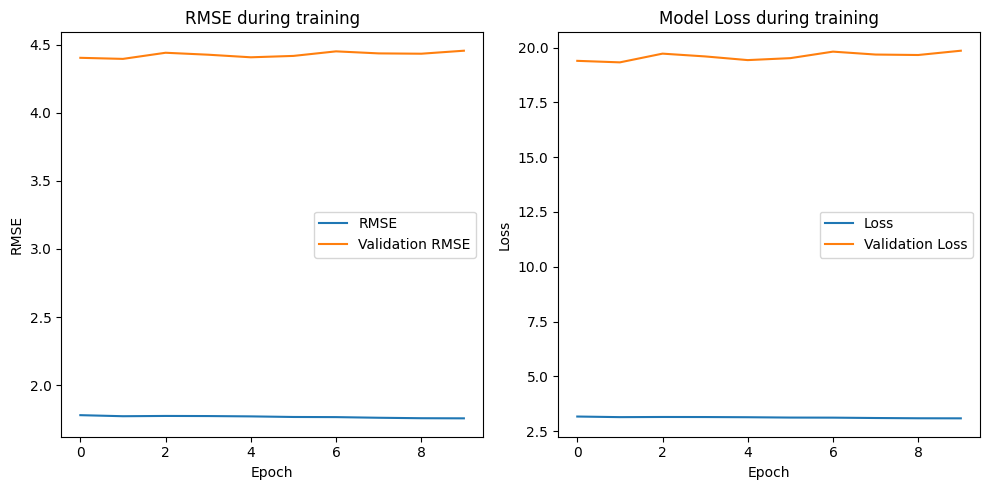

Best Validation RMSE: 4.395911693572998
RMSE: 5.2274
RMSE: 3.8611
Previous models have better RMSE.


In [23]:
import matplotlib.pyplot as plt

# Assuming 'history' object contains the training history from model.fit()
history = model.fit(
    x=[X_train['UserIDEnc'], X_train['BookTitleEnc']],
    y=y_train,
    batch_size=200,
    epochs=10,
    validation_split=0.1,
    verbose=1)

# Plot RMSE and loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['root_mean_squared_error'], label='RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE during training')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss during training')

plt.tight_layout()
plt.show()

# Find the best RMSE
best_rmse = min(history.history['val_root_mean_squared_error']) # Validation RMSE
print(f"Best Validation RMSE: {best_rmse}")

# Compare with results from Section 2 and 3
rmse_section2 = accuracy.rmse(predictions_np)
rmse_section3 = accuracy.rmse(predictions_svd)
if best_rmse < rmse_section2 and best_rmse < rmse_section3:
    print("Neural Network model has a better RMSE than previous models.")
else:
    print("Previous models have better RMSE.")


<font color='red'> **Answer:**</font>
Best Validation RMSE: 4.395911693572998
RMSE: 5.2274
RMSE: 3.8611
Previous models have better RMSE.

**4.3 Use your trained model to recommend books for user with ID 6293. (0.5 points)**

In [33]:
user_id_to_recommend = 6293

encoded_user_id = le_user.transform([user_id_to_recommend])[0]
all_book_titles = df_books['BookTitle'].unique()
encoded_book_titles = le_book.transform(all_book_titles)

predictions = model.predict([np.array([encoded_user_id] * len(all_book_titles)), encoded_book_titles])

recommendations_df = pd.DataFrame({'BookTitle': all_book_titles, 'PredictedRating': predictions.flatten()})

recommendations_df = recommendations_df.sort_values('PredictedRating', ascending=False)

print(f"Top 5 book recommendations for user {user_id_to_recommend}:")
print(recommendations_df.head(5))

InvalidArgumentError: Graph execution error:

Detected at node functional_1/user_embedding_1/GatherV2 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-25-3e0acf8a60d0>", line 13, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 562, in predict

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 259, in one_step_on_data_distributed

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 249, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 104, in predict_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 182, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 637, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py", line 140, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/numpy.py", line 5346, in take

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/numpy.py", line 2093, in take

indices[0,0] = 6292 is not in [0, 6292)
	 [[{{node functional_1/user_embedding_1/GatherV2}}]] [Op:__inference_one_step_on_data_distributed_9535]

## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.

<font color='red'> **Answer:**</font> 3 days


## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:**</font> 8

## Any other comments regarding the homework?

<font color='red'> **Answer:**</font>

In [34]:
# Citing AI usage in the last part to debug errors